In [1171]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Импортируем данные

In [1172]:
Train_data=pd.read_csv("train.csv", sep=",")
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

**1, Преобразуем ДатаСет**

In [1173]:
#Сортировка для удобства
Train_data.sort_values(by=['Id'])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7885,0,0,1.0,109.144492,84.613939,15.0,6,15.0,2011,0.319809,B,B,25,4756,16,2857.0,5,8,B,289034.391871
5549,2,2,1.0,34.472263,16.069376,5.0,5,18.0,1969,0.000000,B,B,33,7425,1,NaN,2,5,B,174548.966339
4808,5,5,3.0,57.607965,38.955672,5.0,3,9.0,1974,0.150818,B,B,16,3433,4,2643.0,4,5,B,258091.883679
4447,6,6,1.0,42.466813,40.010160,1.0,14,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,127196.762031
2684,10,6,3.0,75.888156,78.324716,1.0,11,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,218500.747041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,16793,53,1.0,33.258974,19.576423,6.0,6,12.0,1972,0.313925,B,B,22,4625,11,3855.0,2,10,B,201307.933649
2457,16794,29,2.0,45.280336,32.370920,5.0,8,8.0,1967,0.069660,B,B,31,6119,4,NaN,1,2,B,239503.727371
659,16796,46,1.0,33.013935,22.277019,6.0,4,9.0,1987,0.188784,B,B,31,6137,4,NaN,0,1,B,168233.016477
4768,16797,94,3.0,77.325275,48.101669,10.0,7,16.0,1982,0.282798,B,B,33,8667,2,NaN,0,6,B,354690.491271


In [1174]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Переведем категориальные признаки в числовые 

In [1175]:
#Проверим возможные варианты признака Ecolohy_2
print(Train_data["Ecology_2"].value_counts())
#Проверим возможные варианты признака Ecolohy_3
print(Train_data["Ecology_3"].value_counts())
#Проверим возможные варианты признака Shops_2
print(Train_data["Shops_2"].value_counts())
#Все варианты бинарные, поэтому применяем функцию map
Data_map = {
    "A": 0,
    "B": 1,
}
Train_data["Ecology_2"] = Train_data["Ecology_2"].map(Data_map)
Train_data["Ecology_3"] = Train_data["Ecology_3"].map(Data_map)
Train_data["Shops_2"] = Train_data["Shops_2"].map(Data_map)

B    9903
A      97
Name: Ecology_2, dtype: int64
B    9725
A     275
Name: Ecology_3, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


Переведем числовые признаки ID в строчку 

In [1176]:
Train_data['Id'] = Train_data['Id'].astype(str)
Train_data['DistrictId'] = Train_data['DistrictId'].astype(str)

In [1177]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  int64  
 11  Ecology_3      10000 non-null  int64  
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Обработка выбросов и недостатка данных

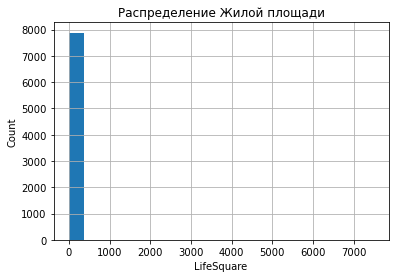

In [1178]:
Train_data['LifeSquare'].hist(bins=20)
plt.xlabel('LifeSquare')
plt.ylabel('Count')
plt.xlabel('LifeSquare')
plt.title('Распределение Жилой площади')
plt.show()

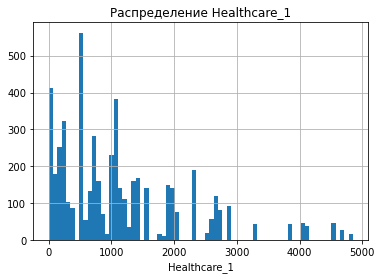

In [1179]:
Train_data['Healthcare_1'].hist(bins=70)
plt.xlabel('Healthcare_1')

plt.title('Распределение Healthcare_1')
plt.show()

In [1180]:
Train_data['LifeSquare'].fillna(Train_data['LifeSquare'].median(), inplace=True)
Train_data['Healthcare_1'].fillna(Train_data['Healthcare_1'].median(), inplace=True)

#Забиваем пустоты медианой, а не средним, чтобы не допустить влияниевыбросов 

1. Исправим "странные значения" комнат параметра Room

In [1181]:
Train_data['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [1182]:
Train_data.loc[Train_data['Rooms'].isin([0, 10, 19]), 'Rooms'] =Train_data['Rooms'].median() 

2.Исправим значения Square

In [1183]:
Train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.888800,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.917500,214138.857399
std,0.812096,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171
max,6.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [1184]:
#Удаляем явные выбросы
Train_data = Train_data[Train_data['Square'].isnull() |
                    (Train_data['Square'] < Train_data['Square'].quantile(.99)) &
                    (Train_data['Square'] > Train_data['Square'].quantile(.01))]

Train_data = Train_data[Train_data['LifeSquare'].isnull() |
                    (Train_data['LifeSquare'] < Train_data['LifeSquare'].quantile(.99)) &
                    (Train_data['LifeSquare'] > Train_data['LifeSquare'].quantile(.01))]

Train_data = Train_data[Train_data['KitchenSquare'].isnull() |
                    (Train_data['KitchenSquare'] < Train_data['KitchenSquare'].quantile(.99)) &
                    (Train_data['KitchenSquare'] > Train_data['KitchenSquare'].quantile(.01))]
#Ограничиваем минимумы значений
Train_data.loc[Train_data['LifeSquare'] < 10, 'LifeSquare'] = 10
Train_data.loc[Train_data['KitchenSquare'] < 3, 'KitchenSquare'] = 3
Train_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,900.0,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,1,35,7715,4,990.0,0,6,1,215898.447742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,900.0,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,32.781260,3.0,12,16.0,2015,0.072158,1,1,2,629,1,900.0,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


3. Исправим пункт floor и housefloor

In [1185]:
#Исправим нулевые значения, ибо вряд ли квартира может находится в цоколе или дом состоять из нуля этажей
Train_data.loc[Train_data['Floor'] == 0, 'Floor'] =1
Train_data.loc[Train_data['HouseFloor'] == 0, 'HouseFloor'] =Train_data['HouseFloor'].median()
#Исправим случае превышения этажности квартиры
floor_outliers = Train_data[Train_data['Floor'] > Train_data['HouseFloor']].index
Train_data.loc[floor_outliers, 'Floor'] = Train_data.loc[floor_outliers, 'HouseFloor']
Train_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8.848000e+03,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000,8848.000000
mean,1.883476,54.734456,34.473306,6.599797,7.860533,12.841659,4.250881e+03,0.119672,0.989941,0.969824,26.106126,5636.478865,8.366297,1039.409245,1.394100,4.436144,0.929815,214855.187974
std,0.796799,16.164725,12.604223,2.793279,5.105576,6.332674,2.131535e+05,0.119673,0.099793,0.171082,17.267244,3977.972421,24.173064,770.862595,1.491651,4.825050,0.255474,89603.516533
min,1.000000,29.719934,10.000000,3.000000,1.000000,1.000000,1.914000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.627579,24.709710,3.000000,4.000000,9.000000,1.972000e+03,0.017647,1.000000,1.000000,11.000000,2370.000000,0.000000,810.000000,0.000000,1.000000,1.000000,156895.897557
50%,2.000000,51.622306,32.781260,6.000000,7.000000,14.000000,1.977000e+03,0.075779,1.000000,1.000000,25.000000,5562.000000,2.000000,900.000000,1.000000,3.000000,1.000000,194169.421353
75%,2.000000,64.624549,41.052147,9.000000,11.000000,17.000000,2.000000e+03,0.194812,1.000000,1.000000,36.000000,7614.000000,5.000000,1036.000000,3.000000,6.000000,1.000000,250272.052869
max,6.000000,117.855969,85.724112,14.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


4. Преобразуем численную характеристику HouseYear в категориальную, так как застройка(планировка, высота потолка и тд), отличается по периодами (Довоенные, Сталинки, хрущевки, строящие и тд) 

In [1186]:
pd.options.mode.chained_assignment = None  # default='warn'
Train_data["HouseYear"].loc[Train_data["HouseYear"]<1945]=0
Train_data["HouseYear"].loc[(1945<Train_data["HouseYear"])&(Train_data["HouseYear"]<1970)]=1
Train_data["HouseYear"].loc[(1970<=Train_data["HouseYear"])&(Train_data["HouseYear"]<2000)]=2
Train_data["HouseYear"].loc[(2000<=Train_data["HouseYear"])&(Train_data["HouseYear"]<2020)]=3
Train_data["HouseYear"].loc[2020<=Train_data["HouseYear"]]=4
Train_data["HouseYear"].value_counts()
Train_data["HouseYear"] = Train_data["HouseYear"].astype("category")
Train_data= pd.get_dummies(Train_data,columns=['HouseYear'])
Train_data.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'HouseYear_0',
 'HouseYear_1',
 'HouseYear_2',
 'HouseYear_3',
 'HouseYear_4']

In [1187]:
med_price_by_district = Train_data.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,147258.736617
1,0,2.0,176210.812334
2,0,3.0,300610.359425
3,1,1.0,146154.352249
4,1,2.0,202907.941458


In [1188]:
Train_data = Train_data.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
Train_data

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,...,Helthcare_2,Shops_1,Shops_2,Price,HouseYear_0,HouseYear_1,HouseYear_2,HouseYear_3,HouseYear_4,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,0.089040,1,...,0,11,1,184966.930730,0,1,0,0,0,203384.328026
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,0.000070,1,...,1,16,1,300009.450063,0,0,1,0,0,300009.450063
2,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,0.437885,1,...,0,5,1,175616.227217,0,0,1,0,0,169246.115943
3,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,0.012339,1,...,2,4,1,150226.531644,0,0,1,0,0,158791.017955
4,12915,59,3.0,80.384479,46.683720,12.0,5.0,17.0,0.309479,1,...,0,6,1,215898.447742,0,0,0,1,0,384517.540046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8843,77,32,2.0,50.401785,30.476203,5.0,5.0,5.0,0.135650,1,...,3,11,1,196684.316040,0,1,0,0,0,233599.115975
8844,6159,18,1.0,41.521546,20.539216,9.0,13.0,13.0,0.000000,1,...,0,5,0,189050.289571,0,0,0,1,0,171162.179903
8845,5123,27,1.0,47.939008,32.781260,3.0,12.0,16.0,0.072158,1,...,0,0,0,159143.805370,0,0,0,1,0,121435.137257
8846,5400,75,2.0,43.602562,33.840147,8.0,1.0,5.0,0.307467,1,...,2,5,1,181595.339808,0,1,0,0,0,187966.419078


**2. Создадим массив X и Y**

In [1189]:
Train_data.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'HouseYear_0',
 'HouseYear_1',
 'HouseYear_2',
 'HouseYear_3',
 'HouseYear_4',
 'MedPriceByDistrict']

In [1190]:
from sklearn.model_selection import train_test_split

feature_names = ['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'HouseYear_0',
 'HouseYear_1',
 'HouseYear_2',
 'HouseYear_3',
 'HouseYear_4']

new_feature_names = ['MedPriceByDistrict']

y = Train_data["Price"]
X = Train_data[feature_names+new_feature_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, shuffle=True, random_state=21)

In [1191]:
X_train.isnull().sum()

Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Healthcare_1          0
Helthcare_2           0
Shops_1               0
Shops_2               0
HouseYear_0           0
HouseYear_1           0
HouseYear_2           0
HouseYear_3           0
HouseYear_4           0
MedPriceByDistrict    0
dtype: int64

**3. Обучаем модель**

In [1192]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=12)
model.fit(X_train,y_train.values.ravel())

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=12)

Предсказываем значение

In [1193]:
y_test_preds = model.predict(X_test)

**4. Определяем качество модели**

In [1194]:
from sklearn.metrics import r2_score
R2=r2_score(y_test_preds, y_test)
R2

0.643872520021499

**5. Проверка модели**

In [1195]:
feature_importances = pd.DataFrame(zip(X_train.columns,model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
21,MedPriceByDistrict,0.627130
1,Square,0.128449
11,Social_3,0.032546
2,LifeSquare,0.031875
3,KitchenSquare,0.029800
4,Floor,0.026823
5,HouseFloor,0.021984
6,Ecology_1,0.016975
12,Healthcare_1,0.016821
10,Social_2,0.016638


**6. Предскажем цены на тестовой выборке**

In [1196]:
Test_data = pd.read_csv('test.csv')

In [1197]:
Test_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [1198]:
####
Test_data['Id'] = Test_data['Id'].astype(str)
Test_data['DistrictId'] = Test_data['DistrictId'].astype(str)
###
Test_data["Ecology_2"] = Test_data["Ecology_2"].map(Data_map)
Test_data["Ecology_3"] = Test_data["Ecology_3"].map(Data_map)
Test_data["Shops_2"] = Test_data["Shops_2"].map(Data_map)
###
Test_data['LifeSquare'].fillna(Test_data['LifeSquare'].median(), inplace=True)
Test_data['Healthcare_1'].fillna(Test_data['Healthcare_1'].median(), inplace=True)
####
Test_data['Square'].fillna(Test_data['Square'].median(), inplace=True)
Test_data['LifeSquare'].fillna(Test_data['LifeSquare'].median(), inplace=True)
Test_data['KitchenSquare'].fillna(Test_data['KitchenSquare'].median(), inplace=True)
Test_data.loc[Test_data['LifeSquare'] < 10, 'LifeSquare'] = 10
Test_data.loc[Test_data['KitchenSquare'] < 3, 'KitchenSquare'] = 3
###
pd.options.mode.chained_assignment = None  # default='warn'
Test_data["HouseYear"].loc[Test_data["HouseYear"]<1945]=0
Test_data["HouseYear"].loc[(1945<Test_data["HouseYear"])&(Test_data["HouseYear"]<1970)]=1
Test_data["HouseYear"].loc[(1970<=Test_data["HouseYear"])&(Test_data["HouseYear"]<2000)]=2
Test_data["HouseYear"].loc[(2000<=Test_data["HouseYear"])&(Test_data["HouseYear"]<2020)]=3
Test_data["HouseYear"].loc[2020<=Test_data["HouseYear"]]=4
Test_data["HouseYear"].value_counts()
Test_data["HouseYear"] = Test_data["HouseYear"].astype("category")
Test_data= pd.get_dummies(Test_data,columns=['HouseYear'])
###
Test_data = Test_data.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
Test_data['MedPriceByDistrict'].fillna(Test_data['MedPriceByDistrict'].median(), inplace=True)
###
###
Test_data.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,HouseYear_0,HouseYear_1,HouseYear_2,HouseYear_3,HouseYear_4,MedPriceByDistrict
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000
mean,1.910000,56.449500,35.630278,6.655000,8.632000,12.601000,0.119874,0.990400,0.970200,24.933800,...,1029.396400,1.31940,4.242800,0.917600,0.010000,0.17000,0.56520,0.253000,0.001800,209756.722203
std,0.838594,19.092787,15.648708,9.640921,5.483228,6.789213,0.120070,0.097518,0.170052,17.532202,...,766.595258,1.47994,4.777365,0.275001,0.099509,0.37567,0.49578,0.434774,0.042392,69017.240977
min,0.000000,1.378543,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,78030.684516
25%,1.000000,41.906231,25.850152,3.000000,4.000000,9.000000,0.019509,1.000000,1.000000,6.000000,...,810.000000,0.00000,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,166268.959295
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,0.072158,1.000000,1.000000,25.000000,...,900.000000,1.00000,3.000000,1.000000,0.000000,0.00000,1.00000,0.000000,0.000000,197419.043625
75%,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,0.195781,1.000000,1.000000,36.000000,...,990.000000,2.00000,6.000000,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,238603.972368
max,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,0.521867,1.000000,1.000000,74.000000,...,4849.000000,6.00000,23.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,593618.746096


In [1199]:
X = Test_data[feature_names+new_feature_names]
X.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,Ecology_1,Ecology_2,Ecology_3,Social_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,HouseYear_0,HouseYear_1,HouseYear_2,HouseYear_3,HouseYear_4,MedPriceByDistrict
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000
mean,1.910000,56.449500,35.630278,6.655000,8.632000,12.601000,0.119874,0.990400,0.970200,24.933800,...,1029.396400,1.31940,4.242800,0.917600,0.010000,0.17000,0.56520,0.253000,0.001800,209756.722203
std,0.838594,19.092787,15.648708,9.640921,5.483228,6.789213,0.120070,0.097518,0.170052,17.532202,...,766.595258,1.47994,4.777365,0.275001,0.099509,0.37567,0.49578,0.434774,0.042392,69017.240977
min,0.000000,1.378543,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,78030.684516
25%,1.000000,41.906231,25.850152,3.000000,4.000000,9.000000,0.019509,1.000000,1.000000,6.000000,...,810.000000,0.00000,1.000000,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,166268.959295
50%,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,0.072158,1.000000,1.000000,25.000000,...,900.000000,1.00000,3.000000,1.000000,0.000000,0.00000,1.00000,0.000000,0.000000,197419.043625
75%,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,0.195781,1.000000,1.000000,36.000000,...,990.000000,2.00000,6.000000,1.000000,0.000000,0.00000,1.00000,1.000000,0.000000,238603.972368
max,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,0.521867,1.000000,1.000000,74.000000,...,4849.000000,6.00000,23.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,593618.746096


In [1200]:
Y_predictions=model.predict(X)

**7. Экспортируем результаты**

In [1221]:
itog= pd.DataFrame({"Id":Test_data['Id'],
    "Price":Y_predictions})
itog

,Id,Price
0,725,162850.136482
1,15856,242222.484026
2,5480,199905.518501
3,15664,293140.614775
4,14275,146351.073961
...,...,...
4995,8180,252290.876667
4996,4695,130908.136203
4997,5783,335264.141783
4998,4780,204052.680722


In [1222]:
itog.to_csv('Ryabko_predictions.csv ', index=False)